In [8]:
# notebooks/content_based.ipynb

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [5]:
# Load dataset
products = pd.read_csv('../data/olist_products_dataset.csv')
items = pd.read_csv('../data/olist_order_items_dataset.csv')
orders = pd.read_csv('../data/olist_orders_dataset.csv')
reviews = pd.read_csv('../data/olist_order_reviews_dataset.csv')

# Lihat 5 baris awal
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


<Axes: title={'center': 'Top 10 Kategori Produk'}, xlabel='product_category_name'>

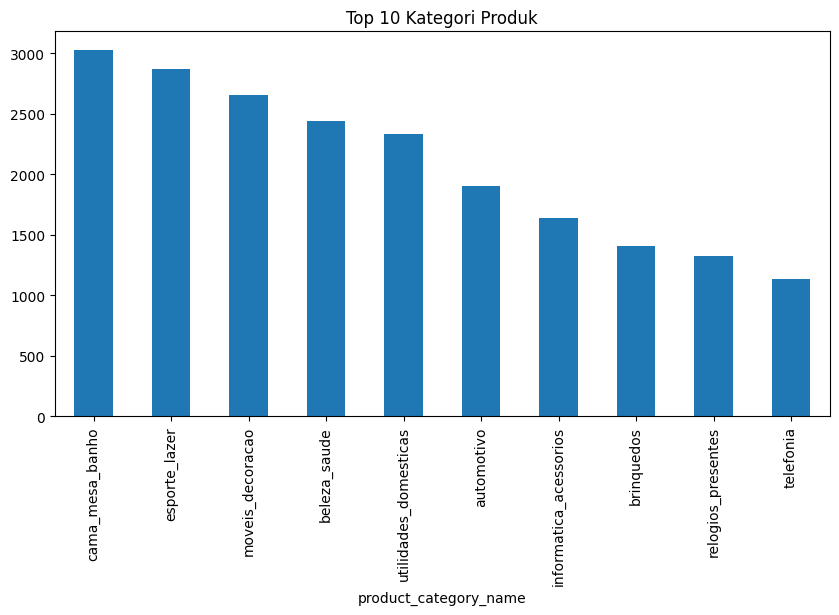

In [2]:
products['product_category_name'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Kategori Produk')

# Preprocessing

In [ ]:
# Isi NaN kategori
products['product_category_name'] = products['product_category_name'].fillna('unknown')

# TF-IDF vectorizer kategori
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(products['product_category_name'])

# Cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [9]:
# Reset index
products = products.reset_index()

# Buat mapping
indices = pd.Series(products.index, index=products['product_id']).drop_duplicates()

In [10]:
def recommend_similar_products(product_id, top_n=5):
    idx = indices[product_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    return products.iloc[product_indices][['product_id', 'product_category_name']]


In [14]:
# Contoh
sample_product = products['product_id'].iloc[20]
recommend_similar_products(sample_product)

,product_id,product_category_name
13,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao
18,a0736b92e52f6cead290e30b578413b6,moveis_decoracao
20,1c1890ba1779090cd54008a3c3302921,moveis_decoracao
24,d03bd02af9fff4b98f1c972315e5e9ef,moveis_decoracao
32,20e37962088a4061d3578def47a8648b,moveis_decoracao
